In [10]:
#Сбор данных и создание таблицы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
cols = [ 'name' , 'gender', 'birth']
years = range(1880, 2011)
pieces = []
for i in years:
    df = pd.read_table('C:\\Users\\admin\\Desktop\\python\\babynames\\yob%d.txt'%i, sep = ',', engine = 'python' , names = cols)
    df['year'] = i
    pieces.append(df)
data = pd.concat(pieces, ignore_index =True)
data 

,name,gender,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


<AxesSubplot:title={'center':'Total birth by sex and year'}, xlabel='year'>

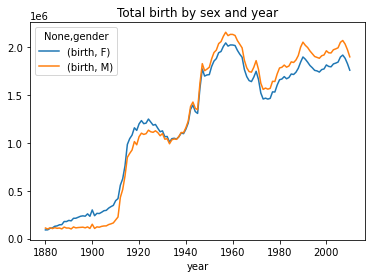

In [11]:
#Сумма родившихся младенцев для каждого года по полу
total_births = data.pivot_table(data, index = 'year', columns = 'gender', aggfunc=sum)
g = total_births.plot (title = "Total birth by sex and year")

In [12]:
#Столбец proportion
def add_prop(group):
    birth = group.birth.astype(float)
    group['prop'] = birth / birth.sum()
    return group
names = data.groupby(['year','gender']).apply(add_prop)
names

,name,gender,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


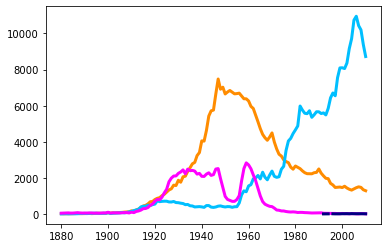

In [17]:
#график 1
graph = pd.pivot_table(data, index = 'year', columns = 'name', values = 'birth', aggfunc = np.sum)
plt.plot(years, graph['Johnny'], color = 'darkorange', lw = 3)
plt.plot(years, graph['Natalie'], color = 'deepskyblue', lw = 3)
plt.plot(years, graph['Bob'], color = 'fuchsia', lw = 3)
plt.plot(years, graph['Oleg'], color = 'navy', lw = 3)

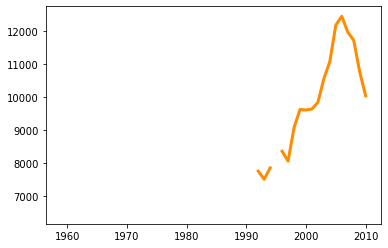

In [18]:
#график 2
graph = pd.pivot_table(data, index = 'year', columns = 'name', values = 'birth', aggfunc = np.sum)
plt.plot(years, graph['Johnny'] + graph['Natalie'] + graph['Bob'] + graph['Oleg'], color = 'darkorange', lw = 3 )

In [19]:
#Топ имен
s = []
for i in range(1880, 2011):
    tab = data[data['year'] == i]
    tab.sort_values('birth', ascending = False)
    h = tab.head(1)
    s.append(h)
h = pd.concat(s, ignore_index = True)
h.pop('gender')
h

,name,birth,year
0,Mary,7065,1880
1,Mary,6919,1881
2,Mary,8149,1882
3,Mary,8012,1883
4,Mary,9217,1884
...,...,...,...
126,Emily,21365,2006
127,Emily,19322,2007
128,Emma,18765,2008
129,Isabella,22222,2009
